In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
employee_df = pd.read_csv("/content/sample_data/data_employee.csv")

employee_df.head()


,EmpID,FirstName,LastName,BusinessUnit,EmployeeStatus
0,3427,Uriah,Bridges,CCDR,Active
1,3428,Paula,Small,EW,Active
2,3429,Edward,Buck,PL,Active
3,3430,Michael,Riordan,CCDR,Active
4,3431,Jasmine,Onque,TNS,Active


In [3]:
employee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmpID           3000 non-null   int64 
 1   FirstName       3000 non-null   object
 2   LastName        3000 non-null   object
 3   BusinessUnit    3000 non-null   object
 4   EmployeeStatus  3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [4]:
# filter karyawan aktif
active_employee = employee_df[
    employee_df["EmployeeStatus"] == "Active"
].copy()


In [5]:
# buat full name
active_employee["FullName"] = (
    active_employee["FirstName"] + " " + active_employee["LastName"]
)


In [6]:
# set role lms
active_employee["LMS_Role"] = "Learner"


In [7]:
lms_user_ready = active_employee[[
    "EmpID",
    "FullName",
    "BusinessUnit",
    "LMS_Role",
    "EmployeeStatus"
]]


In [8]:
lms_user_ready.head()


,EmpID,FullName,BusinessUnit,LMS_Role,EmployeeStatus
0,3427,Uriah Bridges,CCDR,Learner,Active
1,3428,Paula Small,EW,Learner,Active
2,3429,Edward Buck,PL,Learner,Active
3,3430,Michael Riordan,CCDR,Learner,Active
4,3431,Jasmine Onque,TNS,Learner,Active


In [9]:
lms_user_ready.to_csv("lms_user_enrollment_ready.csv", index=False)

from google.colab import files
files.download("lms_user_enrollment_ready.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

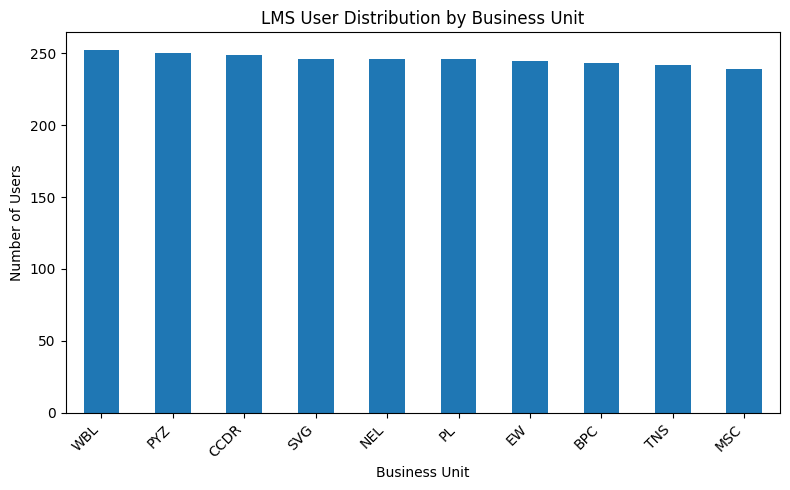

In [10]:
bu_count = lms_user_ready["BusinessUnit"].value_counts()

plt.figure(figsize=(8,5))
bu_count.plot(kind="bar")
plt.title("LMS User Distribution by Business Unit")
plt.xlabel("Business Unit")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
